In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#import dataset
d=pd.read_csv('Student_Data.csv')

In [3]:
d

,Hours_Studied,Sleep_Hours,Sample_Question_Papers_Practiced,Extracurricular_Activities,Previous_Scores,Math_Score,Reading_Score,Writing_Score,Performance_Index
0,5,8,2,No,71.643407,96.000000,91.914810,69.193293,51
1,2,4,8,Yes,44.918561,79.539341,94.110031,65.325012,20
2,7,7,5,Yes,59.397420,79.057943,73.875249,47.492445,46
3,6,8,5,Yes,40.607929,67.180579,63.089488,61.699578,28
4,7,4,6,No,48.502243,68.173916,56.312435,69.173343,41
...,...,...,...,...,...,...,...,...,...
995,2,7,0,No,53.022855,77.161150,80.935222,76.592781,30
996,2,6,6,Yes,33.759178,45.983258,89.832798,72.280321,19
997,2,5,7,Yes,68.466667,59.729003,52.873309,97.884260,41
998,5,9,4,Yes,59.937736,42.519501,76.738999,47.308208,47


In [4]:
# handle text column using label encoding
activities=LabelEncoder()
d['Ext_Act']=activities.fit_transform(d['Extracurricular_Activities'])

In [5]:
d

,Hours_Studied,Sleep_Hours,Sample_Question_Papers_Practiced,Extracurricular_Activities,Previous_Scores,Math_Score,Reading_Score,Writing_Score,Performance_Index,Ext_Act
0,5,8,2,No,71.643407,96.000000,91.914810,69.193293,51,0
1,2,4,8,Yes,44.918561,79.539341,94.110031,65.325012,20,1
2,7,7,5,Yes,59.397420,79.057943,73.875249,47.492445,46,1
3,6,8,5,Yes,40.607929,67.180579,63.089488,61.699578,28,1
4,7,4,6,No,48.502243,68.173916,56.312435,69.173343,41,0
...,...,...,...,...,...,...,...,...,...,...
995,2,7,0,No,53.022855,77.161150,80.935222,76.592781,30,0
996,2,6,6,Yes,33.759178,45.983258,89.832798,72.280321,19,1
997,2,5,7,Yes,68.466667,59.729003,52.873309,97.884260,41,1
998,5,9,4,Yes,59.937736,42.519501,76.738999,47.308208,47,1


In [6]:
#remove extra column
data=d.drop('Extracurricular_Activities',axis='columns')
data

,Hours_Studied,Sleep_Hours,Sample_Question_Papers_Practiced,Previous_Scores,Math_Score,Reading_Score,Writing_Score,Performance_Index,Ext_Act
0,5,8,2,71.643407,96.000000,91.914810,69.193293,51,0
1,2,4,8,44.918561,79.539341,94.110031,65.325012,20,1
2,7,7,5,59.397420,79.057943,73.875249,47.492445,46,1
3,6,8,5,40.607929,67.180579,63.089488,61.699578,28,1
4,7,4,6,48.502243,68.173916,56.312435,69.173343,41,0
...,...,...,...,...,...,...,...,...,...
995,2,7,0,53.022855,77.161150,80.935222,76.592781,30,0
996,2,6,6,33.759178,45.983258,89.832798,72.280321,19,1
997,2,5,7,68.466667,59.729003,52.873309,97.884260,41,1
998,5,9,4,59.937736,42.519501,76.738999,47.308208,47,1


In [7]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     1000 non-null   int64  
 1   Sleep_Hours                       1000 non-null   int64  
 2   Sample_Question_Papers_Practiced  1000 non-null   int64  
 3   Previous_Scores                   1000 non-null   float64
 4   Math_Score                        1000 non-null   float64
 5   Reading_Score                     1000 non-null   float64
 6   Writing_Score                     1000 non-null   float64
 7   Performance_Index                 1000 non-null   int64  
 8   Ext_Act                           1000 non-null   int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 66.5 KB


In [8]:
#check null values
data.isnull().sum()

Hours_Studied                       0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Previous_Scores                     0
Math_Score                          0
Reading_Score                       0
Writing_Score                       0
Performance_Index                   0
Ext_Act                             0
dtype: int64

In [9]:
#correlation
cor=data.corr()

A value of +1 indicates a perfect positive correlation, meaning as one variable increases, the other also increases.
A value of -1 indicates a perfect negative correlation, meaning as one variable increases, the other decreases.
A value of 0 indicates no correlation.

<Axes: >

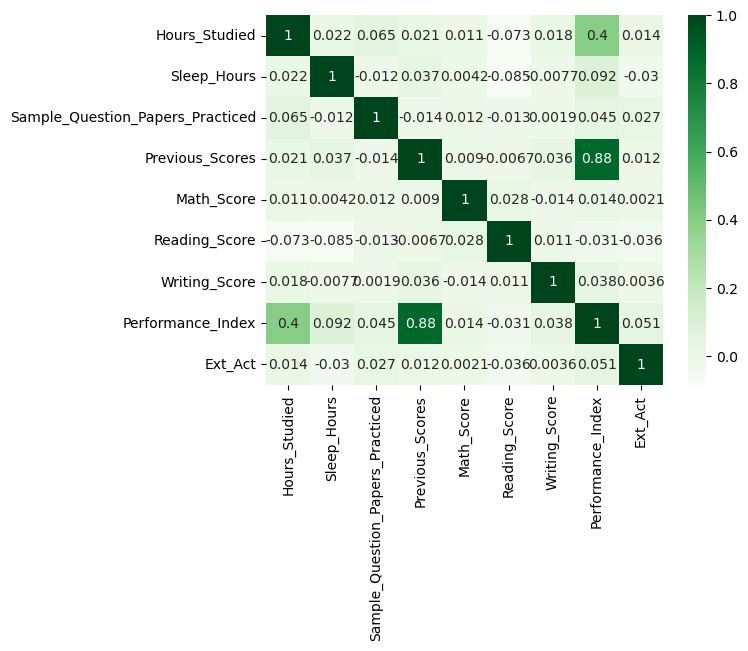

In [11]:
sns.heatmap(cor, annot=True, cmap='Greens')

In [12]:
# separate variables X and Y,
# X is feature (These are the input variables or attributes used to predict the outcome)
# Y is label (These are the input variables or attributes used to predict the outcome.)
X=data.drop('Performance_Index',axis='columns')
X

,Hours_Studied,Sleep_Hours,Sample_Question_Papers_Practiced,Previous_Scores,Math_Score,Reading_Score,Writing_Score,Ext_Act
0,5,8,2,71.643407,96.000000,91.914810,69.193293,0
1,2,4,8,44.918561,79.539341,94.110031,65.325012,1
2,7,7,5,59.397420,79.057943,73.875249,47.492445,1
3,6,8,5,40.607929,67.180579,63.089488,61.699578,1
4,7,4,6,48.502243,68.173916,56.312435,69.173343,0
...,...,...,...,...,...,...,...,...
995,2,7,0,53.022855,77.161150,80.935222,76.592781,0
996,2,6,6,33.759178,45.983258,89.832798,72.280321,1
997,2,5,7,68.466667,59.729003,52.873309,97.884260,1
998,5,9,4,59.937736,42.519501,76.738999,47.308208,1


In [13]:
Y=data.Performance_Index
Y

0      51
1      20
2      46
3      28
4      41
       ..
995    30
996    19
997    41
998    47
999    60
Name: Performance_Index, Length: 1000, dtype: int64

In [14]:
# split data set into training and testing parts
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
#checking length of training and testing data
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

800
200
800
200


In [16]:
#applying Model
M=LinearRegression()

In [17]:
M.fit(X_train,Y_train)

LinearRegression()

In [20]:
# R-Squared
M.score(X_test,Y_test)

0.92004814664774

R-squared (R²), also known as the coefficient of determination, is a statistical measure that indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
An R² value close to 1 indicates that the model explains a large portion of the variance in the dependent variable, whereas an R² close to 0 indicates that the model does not explain much of the variance.

In [29]:
Y_pred=M.predict(X_test)

In [30]:
# mean squared error
mse = np.sqrt(mean_squared_error(Y_test, Y_pred))
mse

5.5447710330044

MSE is the square root of the average of the squared differences between the actual and predicted values.
MSE is useful when you want to measure how spread out the residuals (prediction errors) are. It gives a high penalty to large errors, making it more sensitive to outliers.

In [38]:
# Mean absoute error
mae = mean_absolute_error(Y_test, Y_pred)
mae

4.288634439350646

MAE is the average of the absolute differences between the actual and predicted values. 
MAE is used when you want a straightforward average error measure, without giving extra weight to larger errors as RMSE does. It’s more robust to outliers compared to RMSE

Since your target variable ranges from 10 to 100, an RMSE or MAE value of around 1-5 might indicate good performance, while values above 10 could suggest poor predictions.

In [45]:
#some random values of features (X)
x=[[6,7,5,81,93,92,90,1]]

In [47]:
#intercept
b=M.intercept_
# coefficient
m=M.coef_

In [50]:
#predicting y using mathematical formula
mx=m*x
mx=mx.sum()
y=mx+b
y

70.18884294854796

In [52]:
#predicting y using model (algorithm)
y1=M.predict(x)
y1=float(y1)
y1

C:\Users\Alpha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Alpha\AppData\Local\Temp\ipykernel_8784\188943400.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1=float(y1)


70.18884294854797

In [54]:
#checking wether both are are equal or not to verify
y==y1

False

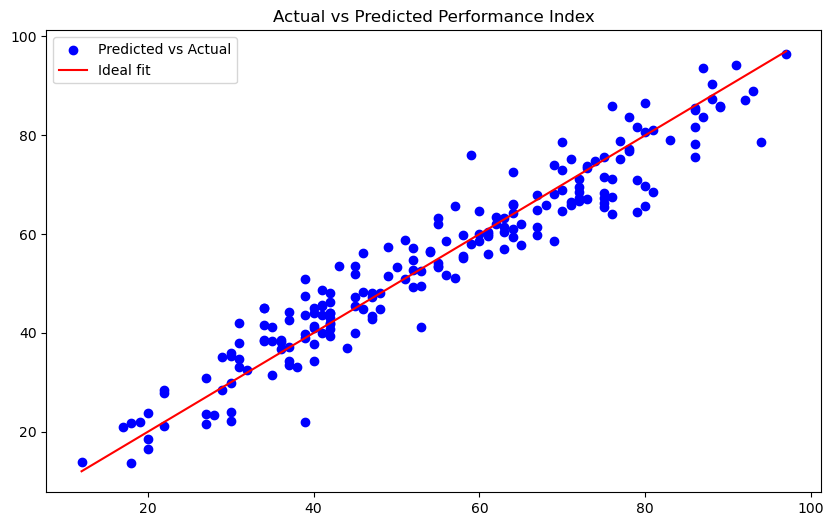

In [56]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', label='Ideal fit')
plt.title('Actual vs Predicted Performance Index')
plt.legend()
plt.show()

The purpose of this plot is to visually compare the actual values of the target variable with the predicted values from the regression model:

Scatter Points: If the model performs well, the scatter points will be close to the red ideal fit line (y = x).
Evaluation: This visualization helps in assessing the model's performance. A dense clustering of points around the ideal fit line indicates good predictive power, while a scatter away from the line suggests inaccuracies in predictions.

In [ ]:

from pathlib import Path
# import Model_Page 
# import Home_Page
# import Calculation_Page


from tkinter import Tk, Canvas, Entry, Text, Button, PhotoImage, Label

def exit_app():
    window.destroy()






x = [[]]
answer = 0


ASSETS_PATH = Path(r"C:\Users\Alpha\Documents\Nexskill\Project 1\ML Project (Student Success Predictor)\Code\assets\frame0")

def relative_to_assets(path: str) -> Path:
    return ASSETS_PATH / Path(path)



# Defining Window

window = Tk()

window.title("Student Success Predictor")

window.geometry("1280x720")
window.configure(bg = "#F6EFE6")






def Equation(x):
    
    #intercept
    b=M.intercept_
    # coefficient
    m=M.coef_

    print(m)
    print(x)
    mx=m*x
    mx=mx.sum()
    y=mx+b

    #predicting y using model (algorithm)
    y1=M.predict(x)
    y1=float(y1)
    y1
    print (y)
    print (y1)
    answer = y1

    return answer


def Prediction():

    
    
    x = np.array([[
        float(entry_1.get()),
        float(entry_2.get()),
        float(entry_3.get()),
        float(entry_4.get()),
        float(entry_5.get()),
        float(entry_6.get()),
        float(entry_7.get()),
        float(entry_8.get())
    ]])
    print(x)
    x = x.astype(float)
    print ('Execution Button Clicked')

    answer = Equation(x)
    answer = f'%.{3}f' %answer

    canvas.delete(answer_text_id)

    canvas.create_text(
    774.0,
    599.0,
    anchor="nw",
    text=f"{answer}",
    fill="#F6EFE6",
    font=("Inter Bold", 24 * -1, 'bold')
    )   


def exit_app():
    window.destroy()



# UI
canvas = Canvas(
    window,
    bg = "#F6EFE6",
    height = 720,
    width = 1280,
    bd = 0,
    highlightthickness = 0,
    relief = "ridge"
)

canvas.place(x = 0, y = 0)
image_image_1 = PhotoImage(
    file=relative_to_assets("image_1.png"))
image_1 = canvas.create_image(
    74.0,
    403.0,
    image=image_image_1
)

button_image_1 = PhotoImage(
    file=relative_to_assets("button_1.png"))
button_1 = Button(
    image=button_image_1,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: print("button_1 clicked"),
    relief="flat"
)
button_1.place(
    x=1220.0,
    y=666.0,
    width=30.0,
    height=30.0
)

canvas.create_text(
    194.0,
    94.0,
    anchor="nw",
    text="PREDICTION CALCULATOR",
    fill="#000000",
    font=("Inter Bold", 36 * -1,"bold")
)

image_image_2 = PhotoImage(
    file=relative_to_assets("image_2.png"))
image_2 = canvas.create_image(
    707.0,
    378.0,
    image=image_image_2
)


image_image_3 = PhotoImage(
    file=relative_to_assets("image_3.png"))
image_3 = canvas.create_image(
    74.0,
    53.0,
    image=image_image_3
)



# About Button
about_image_1 = PhotoImage(
    file=relative_to_assets("button_1.png"))
About_Button = Button(
    image=about_image_1,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: print("button_1 clicked"),
    relief="flat"
)
About_Button.place(
    x=1220.0,
    y=666.0,
    width=30.0,
    height=30.0
)



# Input Boxes

# Row 1
# Entry Box 1
entry_image_1 = PhotoImage(
    file=relative_to_assets("entry_1.png"))
entry_bg_1 = canvas.create_image(
    326.5,
    314.0,
    image=entry_image_1
)
entry_1 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_1.place(
    x=241.0,
    y=293.0,
    width=171.0,
    height=37.0
)


# Entry Box 2
entry_image_2 = PhotoImage(
    file=relative_to_assets("entry_4.png"))
entry_bg_4 = canvas.create_image(
    578.5,
    314.0,
    image=entry_image_2
)
entry_2 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_2.place(
    x=493.0,
    y=293.0,
    width=171.0,
    height=37.0
)


# Entry Box 3
entry_image_3 = PhotoImage(
    file=relative_to_assets("entry_2.png"))
entry_bg_2 = canvas.create_image(
    830.5,
    314.0,
    image=entry_image_3
)
entry_3 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_3.place(
    x=745.0,
    y=293.0,
    width=171.0,
    height=37.0
)


# Entry Box 4
entry_image_4 = PhotoImage(
    file=relative_to_assets("entry_3.png"))
entry_bg_3 = canvas.create_image(
    1082.5,
    314.0,
    image=entry_image_4
)
entry_4 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_4.place(
    x=997.0,
    y=293.0,
    width=171.0,
    height=37.0
)



# Row 2
# Entry Box 5
entry_image_5 = PhotoImage(
    file=relative_to_assets("entry_5.png"))
entry_bg_5 = canvas.create_image(
    326.5,
    455.0,
    image=entry_image_5
)
entry_5 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_5.place(
    x=241.0,
    y=434.0,
    width=171.0,
    height=37.0
)


# Entry Box 6
entry_image_6 = PhotoImage(
    file=relative_to_assets("entry_8.png"))
entry_bg_8 = canvas.create_image(
    578.5,
    455.0,
    image=entry_image_6
)
entry_6 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_6.place(
    x=493.0,
    y=434.0,
    width=171.0,
    height=37.0
)


# Entry Box 7
entry_image_7 = PhotoImage(
    file=relative_to_assets("entry_6.png"))
entry_bg_6 = canvas.create_image(
    830.5,
    455.0,
    image=entry_image_7
)
entry_7 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_7.place(
    x=745.0,
    y=434.0,
    width=171.0,
    height=37.0
)


# Entry Box 8
entry_image_8 = PhotoImage(
    file=relative_to_assets("entry_7.png"))
entry_bg_7 = canvas.create_image(
    1082.5,
    455.0,
    image=entry_image_8
)
entry_8 = Entry(
    bd=0,
    bg="#D9D9D9",
    fg="#000716",
    highlightthickness=0
)
entry_8.place(
    x=997.0,
    y=434.0,
    width=171.0,
    height=37.0
)



def home_playing():
    exit_app()
    script_path = 'Home_Page.py'
    globals()['__file__'] = script_path
    exec(open(script_path).read())

# Home Button
Home_button_image_2 = PhotoImage(
    file=relative_to_assets("button_2.png"))
Home_Button = Button(
    image=Home_button_image_2,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: home_playing(),
    relief="flat"
)
Home_Button.place(
    x=47.0,
    y=133.0,
    width=54.0,
    height=54.0
)





# Header 
canvas.create_text(
    194.0,
    94.0,
    anchor="nw",
    text="PREDICTION CALCULATOR",
    fill="#000000",
    font=("Inter Bold", 36 * -1,"bold")
)
canvas.create_text(
    194.0,
    160.0,
    anchor="nw",
    text="Enter the asked data of the student to get the prediction of his/her expected performance in academics. ",
    fill="#000000",
    font=("Inter Bold", 15 * -1)
)


# Entry Box Texts
canvas.create_text(
    235.0,
    266.0,
    anchor="nw",
    text="Studied Hours",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    989.0,
    266.0,
    anchor="nw",
    text="Previous Score",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    488.0,
    266.0,
    anchor="nw",
    text="Sleep Hours",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    741.0,
    266.0,
    anchor="nw",
    text="Practiced Questions",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    741.0,
    407.0,
    anchor="nw",
    text="Writing Score",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    989.0,
    407.0,
    anchor="nw",
    text="Extra Activities(1/0)",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    235.0, 
    407.0,
    anchor="nw",
    text="Math score",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)

canvas.create_text(
    488.0,
    407.0,
    anchor="nw",
    text="Reading Score",
    fill="#000000",
    font=("Inter Bold", 15 * -1, "bold")
)


# UI Elements
image_image_4 = PhotoImage(
    file=relative_to_assets("image_4.png"))
image_4 = canvas.create_image(
    1185.0,
    92.0,
    image=image_image_4
)

image_image_5 = PhotoImage(
    file=relative_to_assets("image_5.png"))
image_5 = canvas.create_image(
    683.0,
    618.0,
    image=image_image_5
)



# Answer Text
canvas.create_text(
    468.0,
    599.0,
    anchor="nw",
    text="Predicted Performance :",
    fill="#F6EFE6",
    font=("Inter Bold", 24 * -1, 'bold')
)

answer_text_id = canvas.create_text(
    774.0,
    599.0,
    anchor="nw",
    text=f"{answer}",
    fill="#F6EFE6",
    font=("Inter Bold", 24 * -1, 'bold')
)


# Exit Button
Exit_button_image = PhotoImage(
    file=relative_to_assets("button_3.png"))
Exit_Button = Button(
    image=Exit_button_image,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: exit_app(),
    relief="flat"
)
Exit_Button.place(
    x=59.0,
    y=635.0,
    width=40.0,
    height=40.0
)



def model_playing():
    exit_app()
    script_path = 'Model_Page.py'
    globals()['__file__'] = script_path
    exec(open(script_path).read())


# Model Button
Model_button_image = PhotoImage(
    file=relative_to_assets("button_4.png"))
Model_Button = Button(
    image=Model_button_image,
    borderwidth=0,
    highlightthickness=0,
    command=lambda:  model_playing()
    ,
    relief="flat"
)
Model_Button.place(
    x=47.0,
    y=227.0,
    width=54.0,
    height=54.0
)


Predictor_button_image = PhotoImage(
    file=relative_to_assets("button_5.png"))
Predictor_Button = Button(
    image=Predictor_button_image,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: print("button_5 clicked"),
    relief="flat"
)
Predictor_Button.place(
    x=47.0,
    y=321.0,
    width=54.0,
    height=54.0
)


# Execution Button
Executor_button_image = PhotoImage(
    file=relative_to_assets("Prediction_Executor.png"))
Executor_Button = Button(
    image=Executor_button_image,
    borderwidth=0,
    highlightthickness=0,
    command=lambda: Prediction(),
    relief="flat"
)
Executor_Button.place(
    x=1075.0,
    y=546.0,
    width=114.0,
    height=25.0
)

label = Label(
    window,
    text="Predict",       
    font=("Inter Bold", 10),    
    fg="#F6EFE6",         
    bg="#1A332F"             
)
label.place(
    x=1108.0,              
    y=547.0                
)



image_image_6 = PhotoImage(
    file=relative_to_assets("image_6.png"))
image_6 = canvas.create_image(
    32.0,
    348.0,
    image=image_image_6
)


window.resizable(False, False)
window.mainloop()



[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
Execution Button Clicked
[ 2.88551599e+00  6.54429149e-01  2.39160810e-01  9.25035407e-01
  9.37351489e-03 -2.48183621e-03  7.10344667e-03  1.51229785e+00]
[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
-3.3934249405827366
-3.3934249405827366


C:\Users\Alpha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Alpha\AppData\Local\Temp\ipykernel_8784\1078277253.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1=float(y1)


[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
Execution Button Clicked
[ 2.88551599e+00  6.54429149e-01  2.39160810e-01  9.25035407e-01
  9.37351489e-03 -2.48183621e-03  7.10344667e-03  1.51229785e+00]
[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
-3.3934249405827366
-3.3934249405827366


C:\Users\Alpha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Alpha\AppData\Local\Temp\ipykernel_8784\1078277253.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1=float(y1)


[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
Execution Button Clicked
[ 2.88551599e+00  6.54429149e-01  2.39160810e-01  9.25035407e-01
  9.37351489e-03 -2.48183621e-03  7.10344667e-03  1.51229785e+00]
[[ 3.  7. 10. 10. 53. 54. 67.  1.]]
-3.3934249405827366
-3.3934249405827366


C:\Users\Alpha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Alpha\AppData\Local\Temp\ipykernel_8784\1078277253.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1=float(y1)
